In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Target labels:  [1 0 4 4 4 0 8 4 0 2]


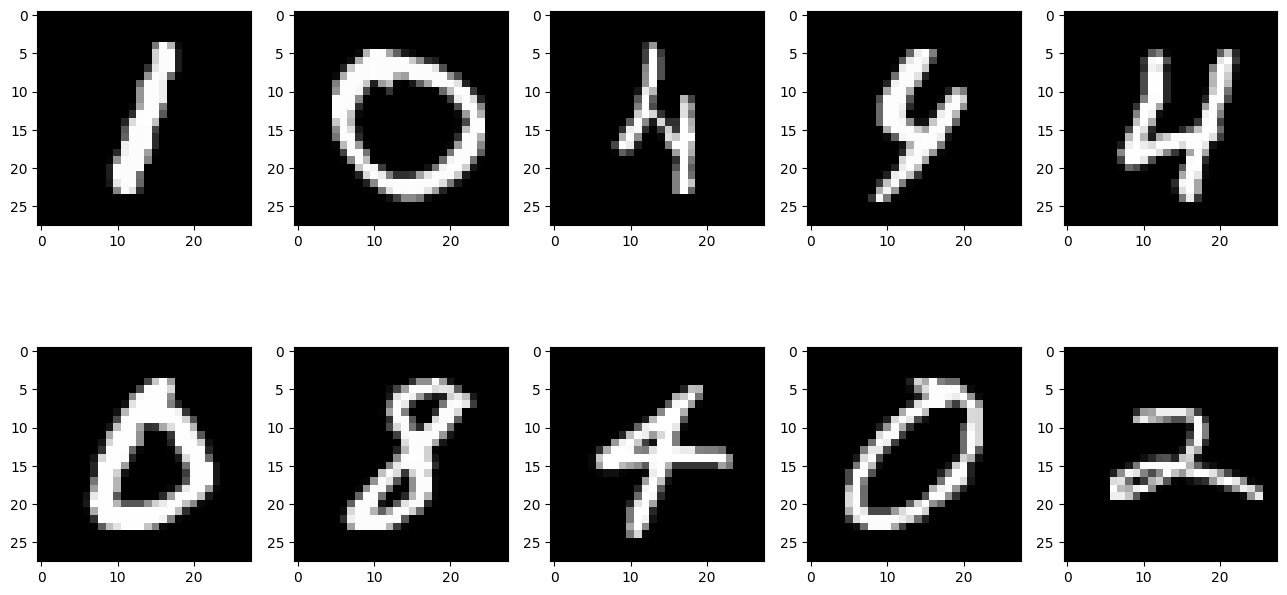

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Target labels:  [0 0 4 1 6 2 9 0 4 3]


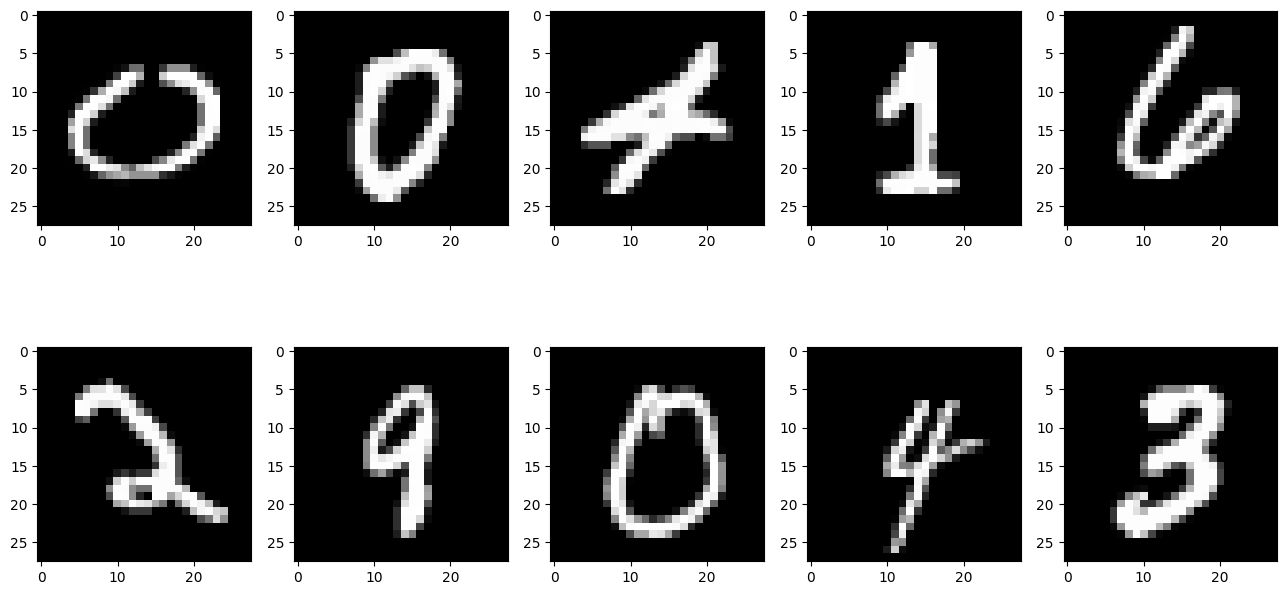

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Target labels:  [4 9 0 9 2 8 1 6 9 0]


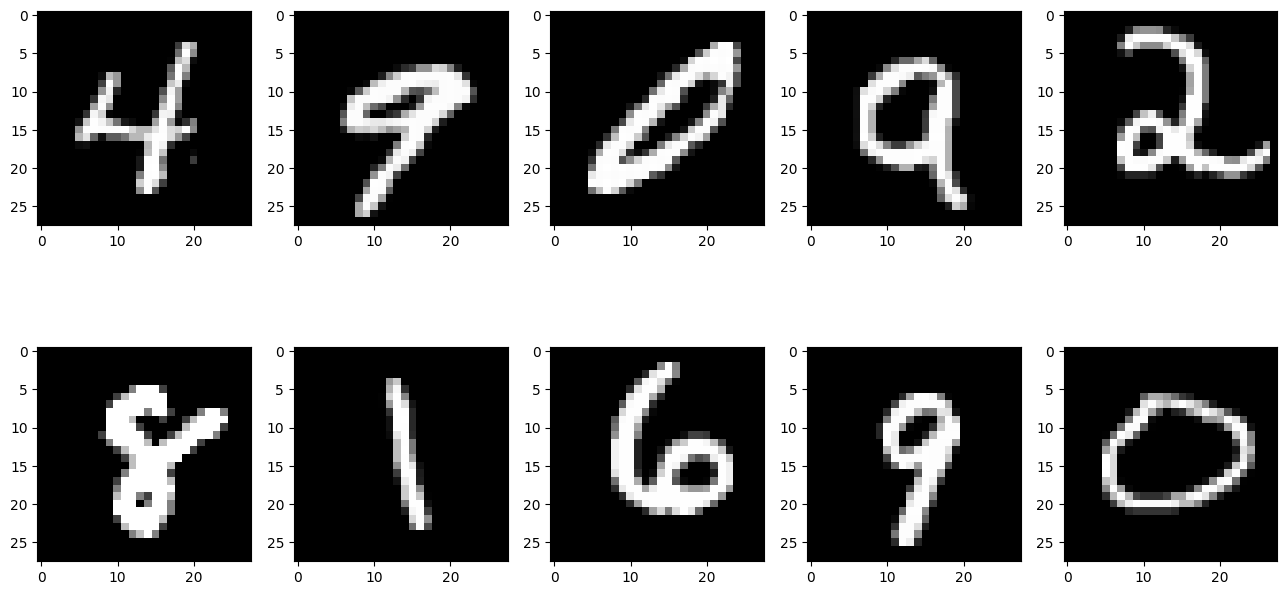

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

In [11]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [16]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256,activation='relu'))
model.add(Dense(128,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10,batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8804 - loss: 0.4028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9710 - loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9805 - loss: 0.0603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9844 - loss: 0.0492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9880 - loss: 0.0384
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9900 - loss: 0.0318
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9930 - loss: 0.0222
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9939 - loss: 0.0200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9927 - loss: 0.0221
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9939 - loss: 0.0176


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

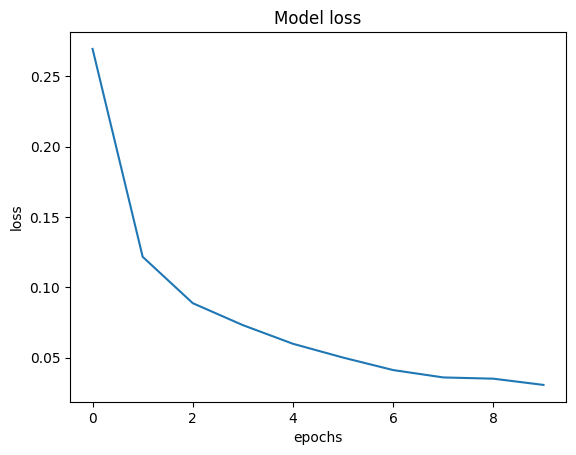

In [13]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

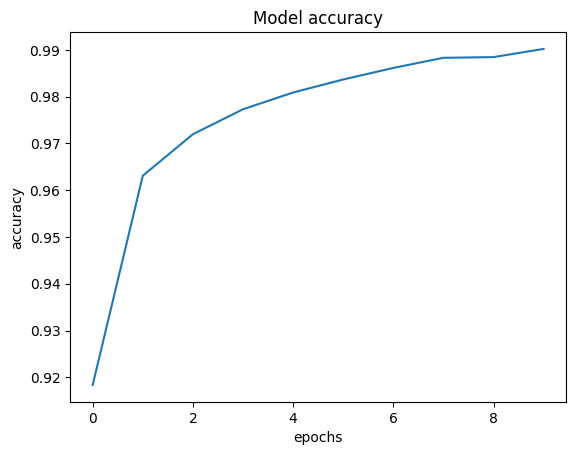

In [14]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [15]:
loss, acc = model.evaluate(new_test_data , new_test_target)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1274


In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')


L1 nad *L2
*

In [21]:
from tensorflow.keras.regularizers import l1, l2

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),   # L1 regularization
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10,batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8348 - loss: 3.1831
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8968 - loss: 0.8578
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9159 - loss: 0.7223
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9237 - loss: 0.6602
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9316 - loss: 0.6075
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9374 - loss: 0.5764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9392 - loss: 0.5484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9412 - loss: 0.5287
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9448 - loss: 0.5074
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9461 - loss: 0.4978


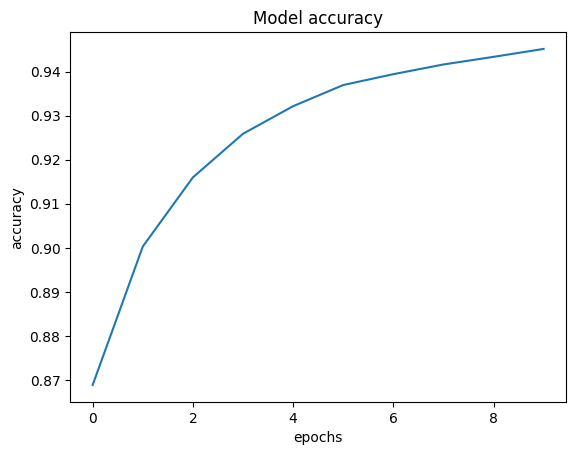

In [23]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [25]:
loss, acc = model.evaluate(new_test_data , new_test_target)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9424 - loss: 0.5140


accuray is resuces

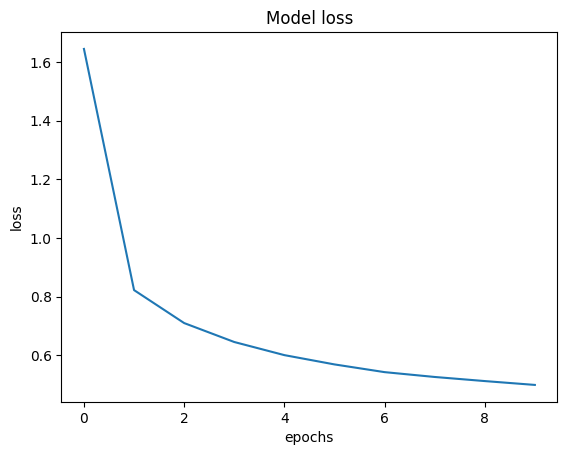

In [24]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

In [26]:
loss, acc = model.evaluate(new_test_data , new_test_target)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9424 - loss: 0.5140


loss is INCREASE